In [1]:
import pynetlogo
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import optuna
sns.set_style("darkgrid")

In [2]:
def initializer(netlogo_path, modelfile):
    global netlogo

    netlogo = pynetlogo.NetLogoLink(gui=False, thd=False, netlogo_home=netlogo_path)
    netlogo.load_model(modelfile)

In [3]:
NETLOGO_HOME = "../dependencies/NetLogo 6.3.0/"
MODEL_PATH = "bees.nlogo"

In [4]:
initializer(NETLOGO_HOME, MODEL_PATH)

In [5]:
def experiment(i):
    netlogo.command("set num-bees-per-hive 50")
    netlogo.command(f"set flower-density {i}")
    netlogo.command("set num-hives 5")
    netlogo.command("set scout-radius 20")

    netlogo.command("setup")
    counts = netlogo.repeat_report(
        ["plot-total-pollen","get-flower-pollen"], 5000
    )
    
    return counts["plot-total-pollen"].mean(), counts["get-flower-pollen"].mean()

In [7]:
def objective(trial):
    x = trial.suggest_float('flower-pollen-density', 0, 1, step=0.05)
    x = float(f"{x:.2f}")
    return experiment(x)

study = optuna.create_study(directions=["maximize", "minimize"])
study.set_metric_names(["pollen", "flower"])
study.optimize(objective, n_jobs=1, n_trials=50, show_progress_bar=True)

[I 2023-06-04 15:56:23,327] A new study created in memory with name: no-name-ac9efdc6-b7e4-40c8-9809-0ab5266a47e0
/tmp/ipykernel_27798/3093777797.py:7: ExperimentalWarning: set_metric_names is experimental (supported from v3.2.0). The interface can change in the future.
  study.set_metric_names(["pollen", "flower"])


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2023-06-04 15:56:32,477] Trial 0 finished with values: {'pollen': 954.5822835432914, 'flower': 518332.1731653669} and parameters: {'flower-pollen-density': 0.35000000000000003}. 
[I 2023-06-04 15:56:42,913] Trial 1 finished with values: {'pollen': 904.2089582083584, 'flower': 425981.0023995201} and parameters: {'flower-pollen-density': 0.30000000000000004}. 
[I 2023-06-04 15:56:56,331] Trial 2 finished with values: {'pollen': 1013.5994801039792, 'flower': 958563.6278744251} and parameters: {'flower-pollen-density': 0.65}. 
[I 2023-06-04 15:57:08,674] Trial 3 finished with values: {'pollen': 999.9432113577285, 'flower': 669007.9096180764} and parameters: {'flower-pollen-density': 0.45}. 
[I 2023-06-04 15:57:21,520] Trial 4 finished with values: {'pollen': 1000.0469906018797, 'flower': 578622.2179564087} and parameters: {'flower-pollen-density': 0.4}. 
[I 2023-06-04 15:57:35,109] Trial 5 finished with values: {'pollen': 1019.3847230553889, 'flower': 817089.1425714857} and parameters: 

In [41]:
# for i in tqdm(np.arange(0, 1, 0.05, dtype=np.float64)):
#     result = experiment(i)
#     sns.lineplot(data=result, x=result.index, y="get-flower-pollen")

In [8]:
study.best_trials

[FrozenTrial(number=9, state=1, values=[961.6638672265547, 349654.1927614477], datetime_start=datetime.datetime(2023, 6, 4, 15, 58, 15, 833864), datetime_complete=datetime.datetime(2023, 6, 4, 15, 58, 26, 805823), params={'flower-pollen-density': 0.25}, user_attrs={}, system_attrs={'nsga2:generation': 0}, intermediate_values={}, distributions={'flower-pollen-density': FloatDistribution(high=1.0, log=False, low=0.0, step=0.05)}, trial_id=9, value=None),
 FrozenTrial(number=13, state=1, values=[457.625674865027, 35311.8950209958], datetime_start=datetime.datetime(2023, 6, 4, 15, 59, 11, 235301), datetime_complete=datetime.datetime(2023, 6, 4, 15, 59, 20, 662672), params={'flower-pollen-density': 0.05}, user_attrs={}, system_attrs={'nsga2:generation': 0}, intermediate_values={}, distributions={'flower-pollen-density': FloatDistribution(high=1.0, log=False, low=0.0, step=0.05)}, trial_id=13, value=None),
 FrozenTrial(number=14, state=1, values=[930.5640871825635, 339995.1569686063], dateti

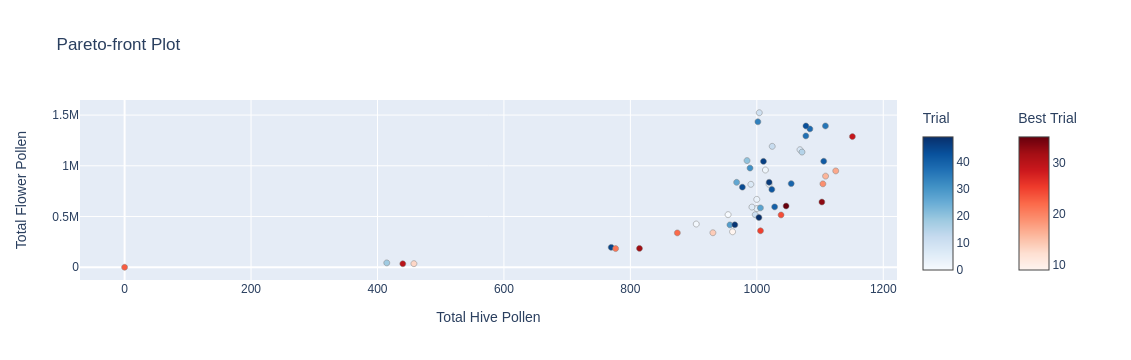

In [22]:
# fig = optuna.visualization.plot_optimization_history(study, target=lambda t: t.values[0])
fig = optuna.visualization.plot_pareto_front(study, target_names=["Total Hive Pollen", "Total Flower Pollen"])
fig.show()